# <center>On performance portability of physical problems using libCEED</center>

<br>
<br>
<br>

### <center>Leila Ghaffari<sup>1</sup>, 
<br>
<center>Valeria Barra<sup>1,2</sup>, Jeremy L. Thompson<sup>1</sup>, James Wright<sup>3</sup>, and Jed Brown<sup>1</sup></center>  

<br>
  
<center><sub><sup><sup>1</sup> Department of Computer Science, CU Boulder</sup></sub></center>  
<center><sub><sup><sup>2</sup> Department of Environmental Science and Engineering, California Institute of Technology</sup></sub></center>
<center><sub><sup><sup>3</sup> Department of Aerospace Engineering, CU Boulder</sup></sub></center>  

<br>
<br>
<br>

<center>WCCM-APCOM</center>
<center>July 2022</center>

<img align="left" src="ecp.png" width="500"/>  <img align="right" src="ceed-exascale-landscape.png" width="600"/>

# Primitive or conservative variables?

#### <center>Compressible Navier-Stokes equations in conservative form</center>

----
\begin{aligned}
   \frac{\partial \rho}{\partial t} + \nabla \cdot \boldsymbol{U} &= 0 \\
   \frac{\partial \boldsymbol{U}}{\partial t} + \nabla \cdot \left( \frac{\boldsymbol{U} \otimes \boldsymbol{U}}{\rho} + P \boldsymbol{I}_3 -\boldsymbol\sigma \right) + \rho g \boldsymbol{\hat k} &= 0 \\
   \frac{\partial E}{\partial t} + \nabla \cdot \left( \frac{(E + P)\boldsymbol{U}}{\rho} -\boldsymbol{u} \cdot \boldsymbol{\sigma} - k \nabla T \right) &= 0 \, , \\
\end{aligned}

-----

<center>$\boldsymbol{\sigma} = \mu(\nabla \boldsymbol{u} + (\nabla \boldsymbol{u})^T + \lambda (\nabla \cdot \boldsymbol{u})\mathbf{I}_3)$</center>


<center>$P = \left( {c_p}/{c_v} -1\right) \left( E - {\boldsymbol{U}\cdot\boldsymbol{U}}/{(2 \rho)} - \rho g z \right)$</center>

#### <center>Vector form</center>

----
Conservative variables: 
\begin{aligned}
\frac{\partial \boldsymbol{U}}{\partial t} + \nabla \cdot \boldsymbol{F}(\boldsymbol{U}) -S(\boldsymbol{U}) = 0 \, ,
\end{aligned}
&nbsp;
<center>$\boldsymbol U = {\rho, \boldsymbol m, E}$</center>


Primitive variables: 
\begin{aligned}
\boldsymbol{A}_0 \frac{\partial \boldsymbol{Y}}{\partial t} + \boldsymbol{A}_i \frac{\partial \boldsymbol{Y}}{\partial x_i} -F(\boldsymbol{Y}) = 0 \,
\end{aligned}
&nbsp;
<center>$\boldsymbol Y = {P, \boldsymbol u, T}$</center>

# [libCEED](https://libceed.readthedocs.io): Efficient Extensible Discretization  

<img align="left" src="libceed-badges.png" width="100%"/>

* High-order finite/spectral element (FEM/SEM) library exploiting tensor-product structure

* Open source (BSD-2 license) C library with Fortran, Python, Julia, and Rust interfaces

* [libCEED User Manual](https://libceed.readthedocs.io/en/latest/)



<img align="left" src="libceed-qr-code.png" width="200"/>   <img align="left" src="libceed-docs-qr-code.png" width="200"/> 

# libCEED's mission


* Purely algebraic FEM library

* Single source vanilla C for QFunctions

* Backend plugins with run-time selection
    * e.g., `./bps -ceed /gpu/cuda`

* User choice of single or double precision

* Same source code can call multiple CEEDs with different backends

* Available via MFEM, PETSc, Nek5000




<img align="right" src="libCEEDBackends.png" width="100%"/>

<center><img align="center" src="libCEEDDecomposition.png" width="2000"/></center>

* <font color='red'>$P$</font> - Process decomposition 
* $\mathcal E$</font> - Element restriction
* <font color='blue'>$B$</font> - Basis (DoFs-to-Qpts) evaluator 
* <font color='green'>$D$</font> - Operator at quadrature point 

# Compressible Navier-Stokes mini-app


#### Problems

---
* Advection
   * Rotation
   * Translation
* Euler
    * Isentropic Vortex 
    * Shock Tube
* Navier-Stokes (newtonian)
    * Density Current
    * Channel
* Flat Plate Boundary Layer
    * Laminal-Blasius
    * Turbulent-Synthetic Turbulence Generation (STG)

#### Stabilization Techniques
* SU (streamline-upwind)
* SUPG (streamline-upwind/Petrov-Galerkin) &rightarrow; **implicit time-stepping**

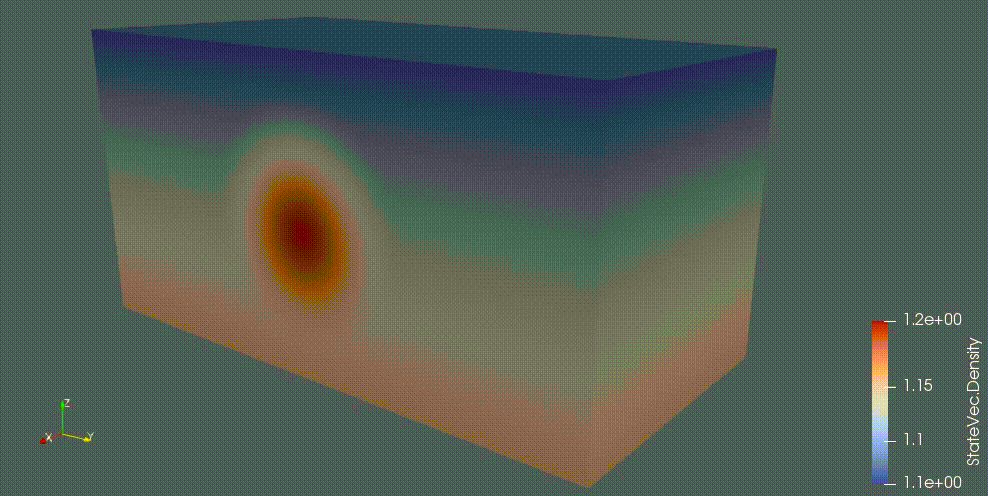


<center><sub><sup>Thanks to James Wright, Kenneth Jansen, Valeria Barra, Jeremy Thompson, Timothy Aiken, Adeleke Bankole, and Jed Brown.</sup></sub></center>

## Blasius Boundary Layer

#### Compressible Blasius boundary layer with Howarth transformation

----
\begin{aligned}
   2 (\rho \mu f^{\prime \prime})^{\prime} + f f^{\prime \prime} &= 0 \\
     (\rho \mu h^{\prime})^{\prime} + \text{Pr} f h^{\prime} + \text{Pr} (\gamma - 1) \text{Ma}^{2} \rho \mu (f^{\prime \prime})^2 &= 0\,  \\
\end{aligned}

----
<sub><sup>$f$: Similarity form for the stream function</sup></sub>  
<sub><sup>$h$: Specific enthalpy at the wall</sup></sub>  
<sub><sup>$\gamma$ = Specific heat ratio</sup></sub>  
<sub><sup>Ma = Mach number</sup></sub>  
<sub><sup>Pr = Prandtl number</sup></sub>  


#### Boundary conditions:
$f(0) = f^{\prime}(0) = h(0) -h_{wall} = f^{\prime}(\infty) - 1 = h(\infty) = 0 $

#### Solution from Chebychev polynomial

----
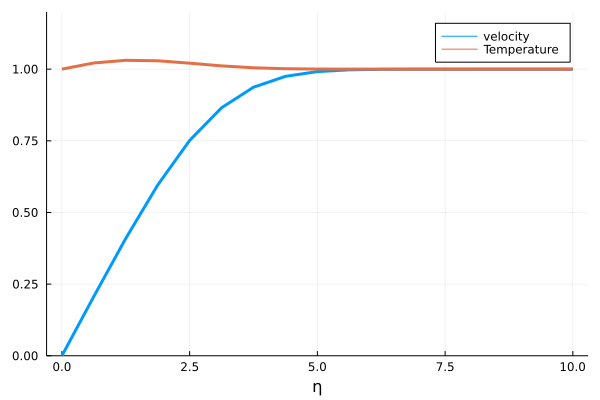

## Blasius Boundary Layer - Energy

#### Polynomial degree 1

----

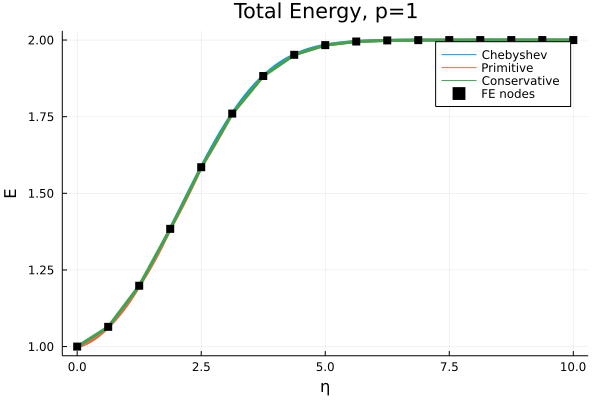

#### Polynomial degree 2

----

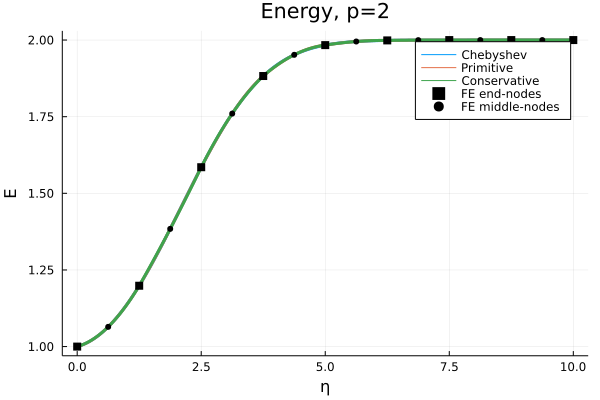

## Blasius Boundary Layer - Temperature

#### Polynomial degree 1

----

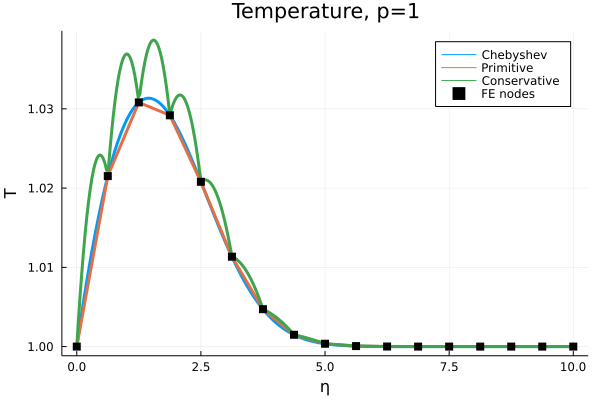

#### Polynomial degree 2

----

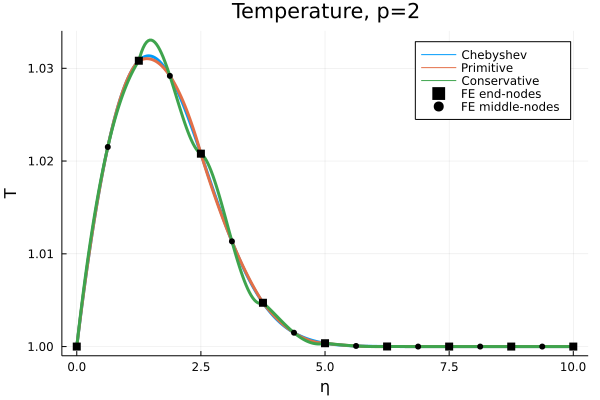

## Isentropic Vortex

# Outlook

  * Turbulence modeling
  * MMS with Algorithmic Differentiation (Enzyme)
  * Robust matrix-free solvers
  * Strong scaling
  * SVE backend
  * SYCL/DPC++ backend
  * Mixed-precision support
  
```
  We invite contributors and friendly users
```

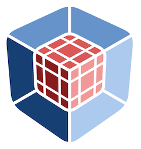



```
This material is based upon work supported 
by the U.S. Department of Energy, Office of 
Science, Office of Advanced Scientific 
Computing Research under Award Number DE-SC0016140.

```